# An Exploration of the Propagation of Error
In this notebook we will demonstrate how error propagates when using measured values in calculations by considering each number as a distribution.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

First we create a distribution that would represent a measurement of 5 with an error of 0.2, or $5\pm0.2$. We will use a distribution size of 100,000 so that the distributions can be visualized well.

In [7]:
size = 100000
mn1  = 5.0
sig1 = 0.2 
d1 = np.random.normal(mn1,sig1,size)

Now we can visualize this "measurement" as a histogram, and for fun we will plot a normalized Gaussian with the same defining parameters.

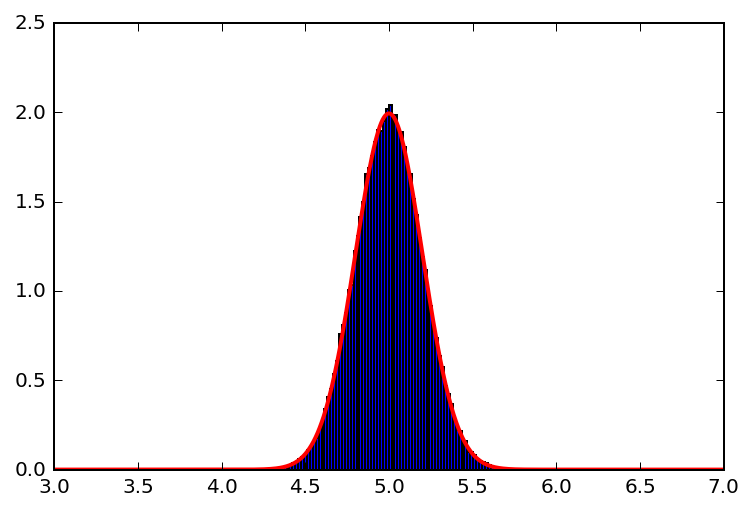

In [8]:
hist1 = plt.hist(d1,bins=100,normed=True)
x= np.linspace(mn1-10*sig1,mn1+10*sig1,1000)
y = 1./(np.sqrt(2*np.pi)*sig1)*np.exp(-(x-mn1)**2/(2*sig1**2))
plt.plot(x,y,'r-',lw=2)

Now let's make another normal distribution with a mean of 3 and standard deviation of 0.1, analagous to a measurement of $3\pm0.1$

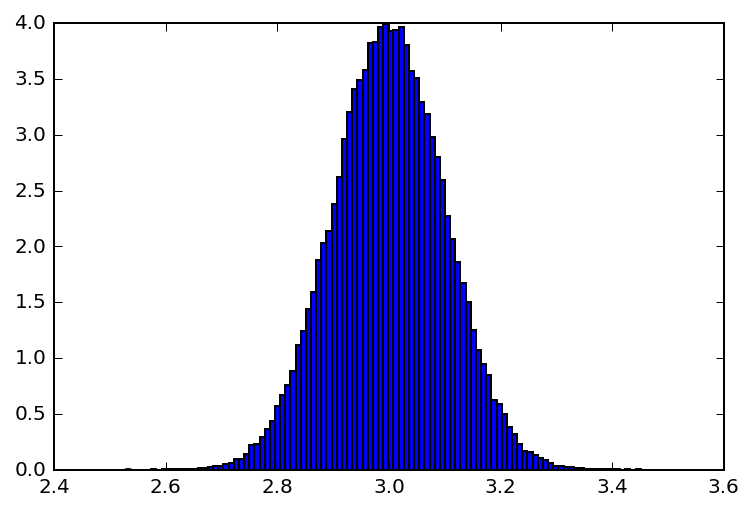

In [11]:
mn2 = 3.0
sig2 = 0.1
d2 = np.random.normal(mn2,sig2,size)
hist2 = plt.hist(d2,bins=100,normed=True)

Now let's plot our two "measurements" on the same plot and look at how they measure up.

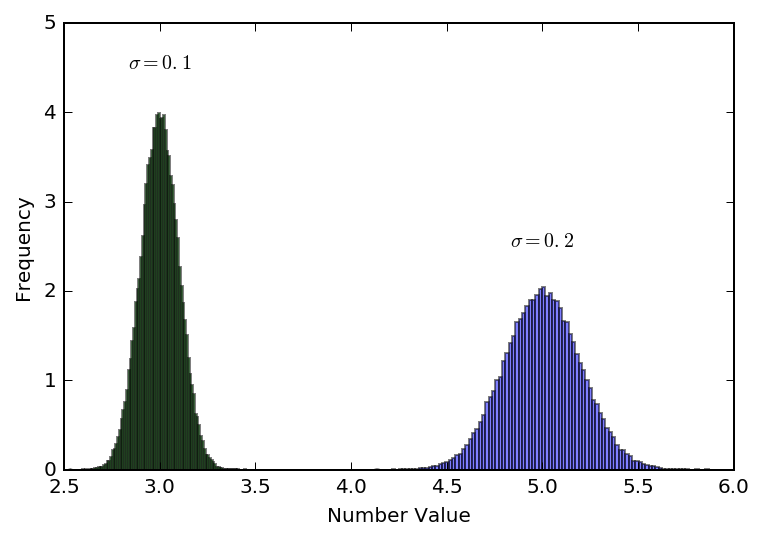

In [15]:
hist1 = plt.hist(d1,bins=100,normed=True,alpha=0.5)
hist2 = plt.hist(d2,bins=100,normed=True,alpha=0.5)
plt.annotate(r'$\sigma = %.1f$' % sig1,(mn1,2.5),ha='center')
plt.annotate(r'$\sigma = %.1f$' % sig2,(mn2,4.5),ha='center')
plt.ylim(0,5)

plt.xlabel('Number Value')
plt.ylabel('Frequency')

Now, let us consider that these two measurements correspond to the sides of a rectangle. What would 1/2 the perimeter of the rectangle be (in other words, $d_1 + d_2$)? You might say, of course it is 8! And you would be right. However, what would the error on that number be?

Before we demonstrate the right answer through generating random numbers, let us do some old fashioned statistics and derive the answer beforehand. Let's consider two numbers $X$ and $Y$ with probability distributions given by:

$${\rm Prob}(X) \propto \exp\left[-\frac{(x-\bar{X})^2}{2\sigma_x^2}\right] \quad {\rm and} \quad {\rm Prob}(Y) \propto \exp\left[-\frac{(y-\bar{Y})^2}{2\sigma_y^2}\right]$$

To make the math simple, let us assume that $\bar{X} = \bar{Y} = 0$. Since $X$ and $Y$ are independent "numbers," the probability of obtaining $X$ <i>and</i> $Y$ will be proportional to the product of the two probabilities. 
$${\rm Prob}(X,Y) \propto \exp\left[-\frac{1}{2}\left(\frac{x^2}{\sigma_x^2} + \frac{y^2}{\sigma_y^2}\right)\right]$$

Now we can use the above equation to calculate the probability of $X + Y$. This can be done using the identity (which you should verify):
$$\frac{x^2}{A} + \frac{y^2}{B} = \frac{(x+y)^2}{A+B} + \frac{(Bx-Ay)^2}{AB(A+B)} \\ = \frac{(x+y)^2}{A+B} + z^2$$

In the second line we have condensed the second term into $z^2$ because its value is not of interest for our situation. We can substitute the above equation into our equation for ${\rm Prob}(X,Y)$ to obtain the following:
$${\rm Prob}(X+Y,Z) \propto \exp\left[-\frac{(x+y)^2}{2(\sigma_x^2+\sigma_y^2)}\right]\exp\left(-\frac{z^2}{2}\right)$$

Finally, what we want is the probability of obtaining $X+Y$ irrespective of the value of $Z$. In other words, we can think of the above equation as a probability distribution which is the result of two independent events, $X+Y$ and $Z$. There is a mathematical operation called "marginalization" that can rid us of this $z$ term. But for us (who have not had calculus), we will simply interpret the first term as thus:
$${\rm Prob}(X+Y) \propto \exp\left[-\frac{(x+y)^2}{2(\sigma_x^2+\sigma_y^2)}\right]$$

This proof can be done for the more complicated situation in which $\bar{X}$ and $\bar{Y}$ are not equal to zero, it's just... well... more complicated. 

The take away result here is that the addition of two probability distributions result in a final probability distribution with a standard deviation:
$$\sigma_{x+y} = \sqrt{\sigma_x^2+\sigma_y^2}$$
This is called "adding in quadrature," or the square root of the sum of squares. This comes up often in statistics because of the simple fact that this is how Gaussians add.

Now let's look at how this plays out numerically

Measured standard deviation = 0.2231
Theoretical standard deviation = 0.2236


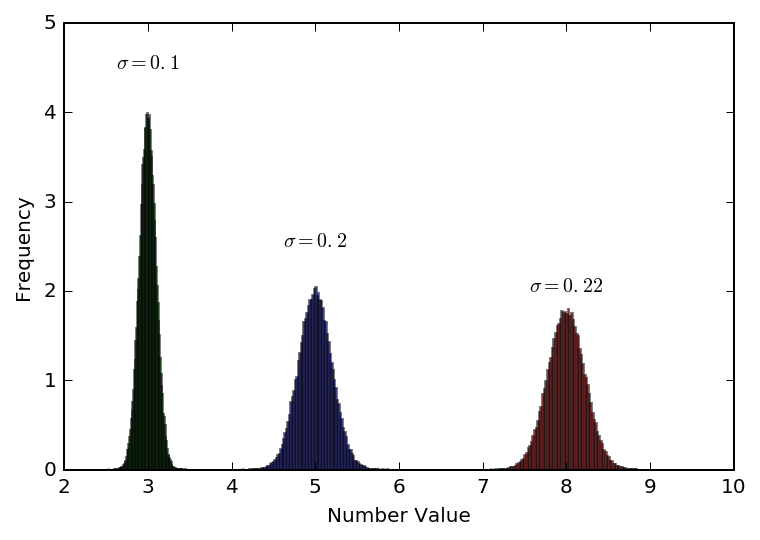

In [24]:
# The distributions simply add!
d3 = d2+d1
mn3 = np.mean(d3)

hist1 = plt.hist(d1,bins=100,normed=True,alpha=0.5)
hist2 = plt.hist(d2,bins=100,normed=True,alpha=0.5)
hist3 = plt.hist(d3,bins=100,alpha=0.5,normed=True)

plt.annotate(r'$\sigma = %.1f$' % sig1,(mn1,2.5),ha='center')
plt.annotate(r'$\sigma = %.1f$' % sig2,(mn2,4.5),ha='center')
plt.ylim(0,5)

plt.xlabel('Number Value')
plt.ylabel('Frequency')
# What is the real standard deviation?
std3r = np.std(d3,ddof=1)
# What do we expect?
std3c = np.sqrt(sig1**2+sig2**2)
# Annotate the plot
plt.annotate(r'$\sigma = %.2f$' % std3r,(mn3,2.0),ha='center')
print 'Measured standard deviation = %.4f'%std3r
print 'Theoretical standard deviation = %.4f'%std3c

What about if we multiply the two "measurements" together. We expect the mean to be the product of the means (<i>i.e.</i>, 15). But what should the error be? To understand this fully, we'd need a bit of calculus. Until then, suffice it to say that the canonical approach is to use this formula:
$${\rm Prob}(X \times Y) = \sqrt{(\bar{X}\sigma_y)^2 + (\bar{Y}\sigma_x)^2} $$

Measured standard deviation = 0.7794
Theoretical standard deviation = 0.7810


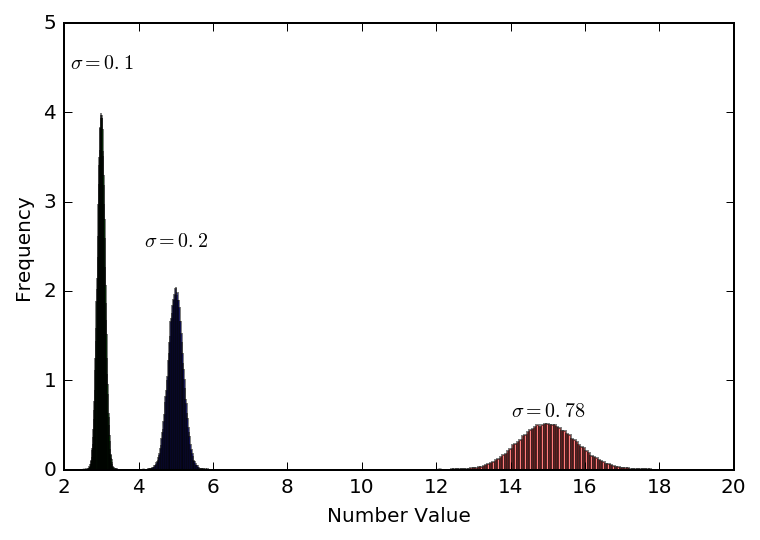

In [40]:
# What happens when we multiply the two distributions?
d4 = d1*d2
mn4 = np.mean(d4)
# Plot the resultant distribution
hist1 = plt.hist(d1,bins=100,normed=True,alpha=0.5)
hist2 = plt.hist(d2,bins=100,normed=True,alpha=0.5)
hist4 = plt.hist(d4,bins=100,alpha=0.5,normed=True)

plt.annotate(r'$\sigma = %.1f$' % sig1,(mn1,2.5),ha='center')
plt.annotate(r'$\sigma = %.1f$' % sig2,(mn2,4.5),ha='center')
plt.ylim(0,5)

plt.xlabel('Number Value')
plt.ylabel('Frequency')

# What is the real standard deviation?
std4r = np.std(d4,ddof=1)
# What do we expect?
std4c = np.sqrt((sig2*np.mean(d1))**2 + (sig1*np.mean(d2))**2)
# Annotate plot
plt.annotate(r'$\sigma = %.2f$' % std4r,(mn4,0.6),ha='center')

print 'Measured standard deviation = %.4f'%std4r
print 'Theoretical standard deviation = %.4f'%std4c

The values for standard deviation are close. But this is actually an approximation of the error using a trick called the "tangent line approximation." This approximation is not such a bad one as we can see by zooming in on the final distribution.

(12, 18)

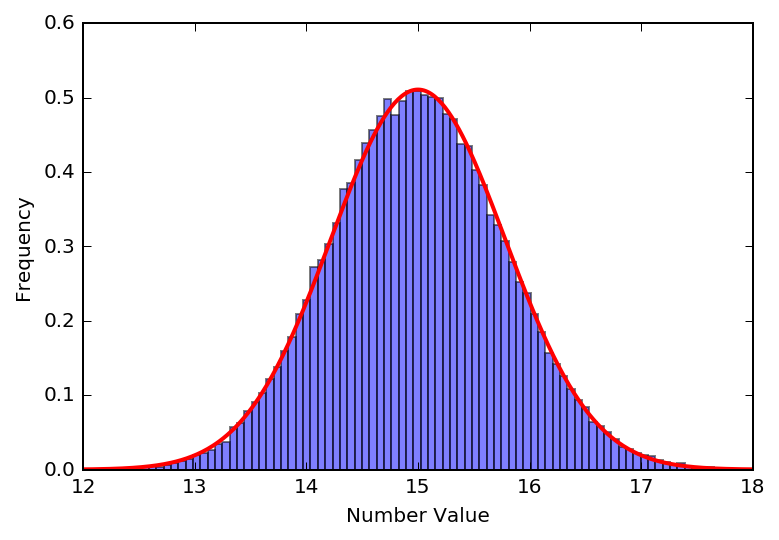

In [41]:
hist4 = plt.hist(d4,bins=100,alpha=0.5,normed=True)
plt.xlabel('Number Value')
plt.ylabel('Frequency')

x= np.linspace(mn4-10*std4c,mn4+10*std4c,1000)
y = 1./(np.sqrt(2*np.pi)*std4c)*np.exp(-(x-mn4)**2/(2*std4c**2))
plt.plot(x,y,'r-',lw=2)
plt.xlim(12,18)

If we multiply the "number" $d_1$ by itself a few times, though, we can see how this approximation breaks down. In this case, the theoretical standard deviation would be $\sigma_5 = 4d_1^3\sigma_1$ (you're gonna hafta take my word for it). But look what happens to the distribution...

Measured standard deviation = 100.6950
Theoretical standard deviation = 100.0058


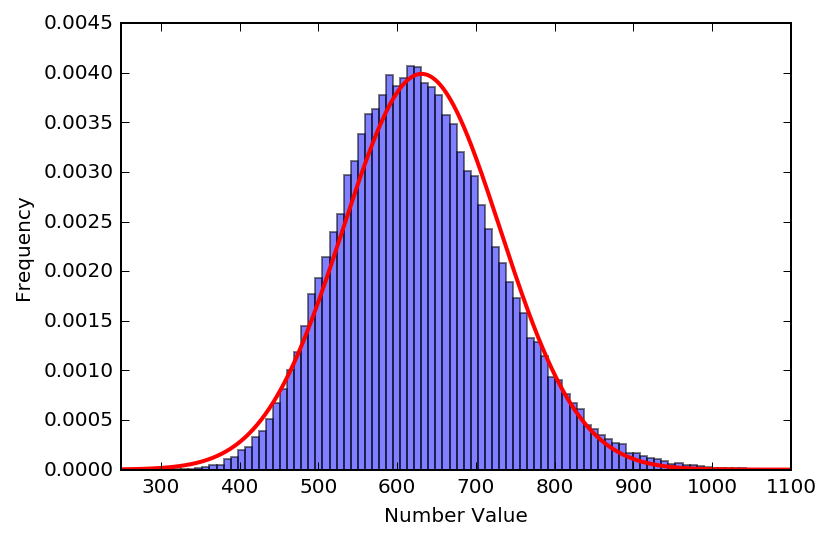

In [42]:
d5 = d1**4.0
mn5 = np.mean(d5)

std5r = np.std(d5,ddof=1)
std5c = 4.0*np.mean(d1)**3*sig1

hist5 = plt.hist(d5,bins=100,alpha=0.5,normed=True)
plt.xlabel('Number Value')
plt.ylabel('Frequency')

x= np.linspace(mn5-5*std5c,mn5+5*std5c,1000)
y = 1./(np.sqrt(2*np.pi)*std5c)*np.exp(-(x-mn5)**2/(2*std5c**2))
plt.plot(x,y,'r-',lw=2)
plt.xlim(250,1100)

print 'Measured standard deviation = %.4f'%std5r
print 'Theoretical standard deviation = %.4f'%std5c

The standard deviations are pretty much in agreement, but the final distribution has significant skew, and the mode is not equal to the mean. This is a case where propagating error numerically has huge benefits.